## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
#config = ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Myfiles\Apps\envs\tensor\lib\site-packages\ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
287/287 [==============================] - 147s 495ms/step - loss: 2.3301 - accuracy: 0.6810 - val_loss: 0.9017 - val_accuracy: 0.8129
Epoch 2/10
287/287 [==============================] - 132s 460ms/step - loss: 1.2130 - accuracy: 0.8019 - val_loss: 1.3118 - val_accuracy: 0.7969
Epoch 3/10
287/287 [==============================] - 135s 472ms/step - loss: 1.1242 - accuracy: 0.8283 - val_loss: 1.9592 - val_accuracy: 0.7684
Epoch 4/10
287/287 [==============================] - 138s 479ms/step - loss: 1.1705 - accuracy: 0.8393 - val_loss: 1.2736 - val_accuracy: 0.8262
Epoch 5/10
287/287 [==============================] - 139s 484ms/step - loss: 1.2501 - accuracy: 0.8454 - val_loss: 1.4851 - val_accuracy: 0.8288
Epoch 6/10
287/287 [==============================] - 140s 486ms/step - loss: 1.0474 - accuracy: 0.8722 - val_loss: 1.9482 - val_accuracy: 0.7941
Epoch 7/10
287/287 [==============================] - 136s 472ms/step - loss: 0.9590 - accuracy: 0.8831 - val_loss: 1.2486 -

In [15]:
import matplotlib.pyplot as plt

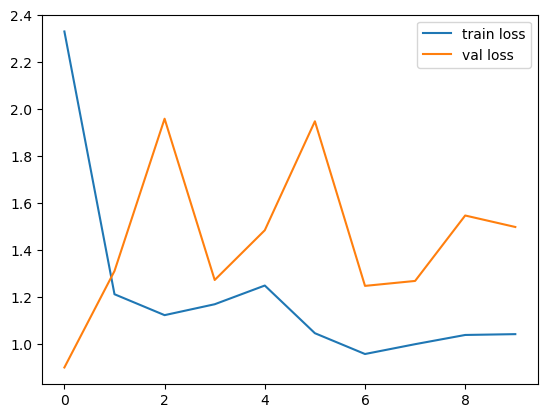

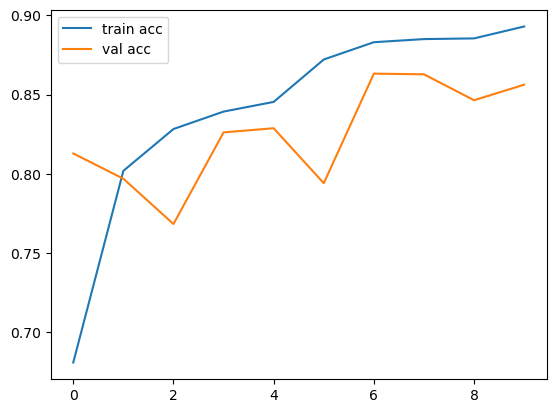

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [18]:

y_pred = model.predict(test_set)


72/72 [==============================] - 9s 113ms/step


In [19]:
y_pred

array([[0.0000000e+00, 3.5545421e-12, 2.1753196e-12, ..., 1.6429284e-20,
        1.0000000e+00, 1.2824733e-23],
       [4.9641746e-34, 0.0000000e+00, 6.5790949e-35, ..., 1.2580519e-23,
        1.0180975e-32, 1.0000000e+00],
       [0.0000000e+00, 1.3546881e-07, 4.0677038e-05, ..., 0.0000000e+00,
        9.4167889e-22, 0.0000000e+00],
       ...,
       [3.9619627e-15, 8.5209951e-21, 3.0211618e-28, ..., 2.0132751e-33,
        3.8009686e-20, 9.9551434e-35],
       [1.2270232e-35, 8.0917912e-24, 1.5256679e-37, ..., 3.0590195e-32,
        3.4954767e-28, 1.0000000e+00],
       [7.8218416e-13, 5.1626741e-11, 9.9986637e-01, ..., 5.8545142e-20,
        1.6335259e-24, 1.2128427e-14]], dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([8, 9, 3, ..., 4, 9, 2], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_inception.h5')

In [32]:
img=image.load_img('Datasets/test/Tomato___Late_blight/try.JPG',target_size=(224,224))



In [33]:
x=image.img_to_array(img)
x

array([[[168., 149., 143.],
        [159., 140., 134.],
        [152., 133., 127.],
        ...,
        [182., 173., 176.],
        [184., 175., 180.],
        [189., 180., 185.]],

       [[159., 140., 134.],
        [153., 134., 128.],
        [150., 131., 125.],
        ...,
        [184., 175., 178.],
        [183., 174., 179.],
        [186., 177., 182.]],

       [[154., 135., 129.],
        [151., 132., 126.],
        [151., 132., 126.],
        ...,
        [184., 173., 177.],
        [181., 172., 177.],
        [182., 173., 178.]],

       ...,

       [[153., 134., 128.],
        [149., 130., 124.],
        [147., 128., 122.],
        ...,
        [187., 171., 171.],
        [188., 172., 172.],
        [182., 166., 166.]],

       [[154., 135., 129.],
        [149., 130., 124.],
        [146., 127., 121.],
        ...,
        [187., 171., 171.],
        [182., 166., 166.],
        [185., 169., 169.]],

       [[158., 139., 133.],
        [152., 133., 127.],
        [148., 1

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[1.80623796e-14, 1.17509358e-03, 9.98648703e-01, 4.69138172e-07,
        1.58166033e-04, 1.96523110e-11, 1.79374751e-07, 5.80671843e-16,
        2.34760205e-06, 1.50161795e-05]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 6ms/step


In [43]:
a==2

array([ True])

In [40]:
import tensorflow as tf

In [41]:
tf.__version__

'2.10.1'